In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
train_data=pd.read_excel(r'E:\My documents\Udemy_Data Science\Data_Train.xlsx')

In [54]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [55]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [56]:
train_data.dropna(inplace=True)

In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [58]:
def change_totime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [59]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [60]:
for i in ('Date_of_Journey','Dep_Time', 'Arrival_Time'):
    change_totime(i)

In [61]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [62]:
train_data['journey_day']=train_data['Date_of_Journey'].dt.day
train_data['journey_month']=train_data['Date_of_Journey'].dt.month

In [63]:
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [64]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-05-28 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-28 05:50:00,2021-05-28 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-28 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-05-28 18:05:00,2021-05-28 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-05-28 16:50:00,2021-05-28 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [65]:
duration=list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h '+duration[i]
        

In [66]:
train_data['Duration']=duration

In [67]:
train_data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-05-28 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-28 05:50:00,2021-05-28 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-28 09:25:00,2021-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-05-28 18:05:00,2021-05-28 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-05-28 16:50:00,2021-05-28 21:35:00,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2021-05-28 19:55:00,2021-05-28 22:25:00,2h 30m,non-stop,No info,4107,4,9
10679,Air India,Kolkata,Banglore,CCU → BLR,2021-05-28 20:45:00,2021-05-28 23:20:00,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2021-05-28 08:20:00,2021-05-28 11:20:00,3h 0m,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,2021-05-28 11:30:00,2021-05-28 14:10:00,2h 40m,non-stop,No info,12648,3,1


In [68]:
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour
def extract_min(df,col):
    df[col+'_minutes']=df[col].dt.minute
def drop_col(df,col):
    df.drop(col,axis=1,inplace=True)
    
    
    

In [69]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_col(train_data,'Dep_Time')

extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_col(train_data,'Arrival_Time')

In [70]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [71]:
train_data['Duration'][0].split()[0][0:-1]

'2'

In [72]:
def hours(x):
    return x.split()[0][0:-1]

def minute(x):
    return x.split()[1][0:-1]

In [73]:
train_data['Duration_hours']=train_data['Duration'].apply(hours)
train_data['Duration_mins']=train_data['Duration'].apply(minute)
drop_col(train_data,'Duration')


In [74]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Airline               10682 non-null  object
 1   Source                10682 non-null  object
 2   Destination           10682 non-null  object
 3   Route                 10682 non-null  object
 4   Total_Stops           10682 non-null  object
 5   Additional_Info       10682 non-null  object
 6   Price                 10682 non-null  int64 
 7   journey_day           10682 non-null  int64 
 8   journey_month         10682 non-null  int64 
 9   Dep_Time_hour         10682 non-null  int64 
 10  Dep_Time_minutes      10682 non-null  int64 
 11  Arrival_Time_hour     10682 non-null  int64 
 12  Arrival_Time_minutes  10682 non-null  int64 
 13  Duration_hours        10682 non-null  object
 14  Duration_mins         10682 non-null  object
dtypes: int64(7), object(8)
memory usage:

In [75]:
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [103]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [77]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Airline               10682 non-null  object
 1   Source                10682 non-null  object
 2   Destination           10682 non-null  object
 3   Route                 10682 non-null  object
 4   Total_Stops           10682 non-null  object
 5   Additional_Info       10682 non-null  object
 6   Price                 10682 non-null  int64 
 7   journey_day           10682 non-null  int64 
 8   journey_month         10682 non-null  int64 
 9   Dep_Time_hour         10682 non-null  int64 
 10  Dep_Time_minutes      10682 non-null  int64 
 11  Arrival_Time_hour     10682 non-null  int64 
 12  Arrival_Time_minutes  10682 non-null  int64 
 13  Duration_hours        10682 non-null  int32 
 14  Duration_mins         10682 non-null  int32 
dtypes: int32(2), int64(7), object(6)
mem

# List comprehension usage 

In [104]:
cat_col= [col for col in train_data.columns if train_data[col].dtype=='O']

In [79]:
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [105]:
cont_col= [col for col in train_data.columns if train_data[col].dtype!='O']

In [81]:
## Nominal Data - Onehot
## Ordinal data - LabelEncoder

In [106]:
categorical = train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [107]:
cont_col


['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minutes',
 'Arrival_Time_hour',
 'Arrival_Time_minutes',
 'Duration_hours',
 'Duration_mins']

In [108]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


<AxesSubplot:xlabel='Airline', ylabel='Price'>

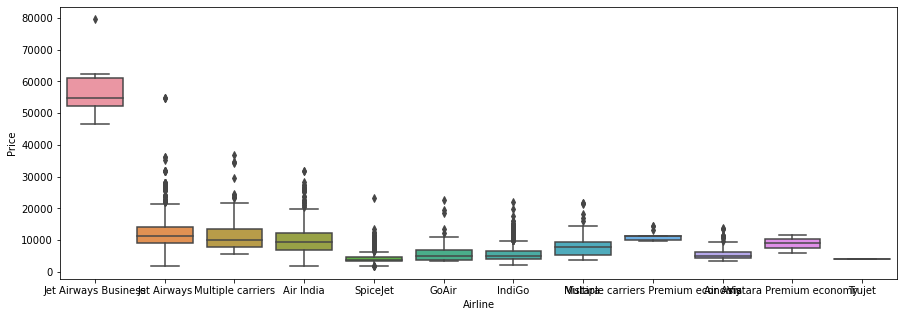

In [109]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))


In [110]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Airline               10682 non-null  object
 1   Source                10682 non-null  object
 2   Destination           10682 non-null  object
 3   Route                 10682 non-null  object
 4   Total_Stops           10682 non-null  object
 5   Additional_Info       10682 non-null  object
 6   Price                 10682 non-null  int64 
 7   journey_day           10682 non-null  int64 
 8   journey_month         10682 non-null  int64 
 9   Dep_Time_hour         10682 non-null  int64 
 10  Dep_Time_minutes      10682 non-null  int64 
 11  Arrival_Time_hour     10682 non-null  int64 
 12  Arrival_Time_minutes  10682 non-null  int64 
 13  Duration_hours        10682 non-null  int32 
 14  Duration_mins         10682 non-null  int32 
dtypes: int32(2), int64(7), object(6)
mem

In [111]:
Source=pd.get_dummies(train_data['Source'])


In [112]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_day', 'journey_month',
       'Dep_Time_hour', 'Dep_Time_minutes', 'Arrival_Time_hour',
       'Arrival_Time_minutes', 'Duration_hours', 'Duration_mins'],
      dtype='object')

<AxesSubplot:xlabel='Destination', ylabel='Price'>

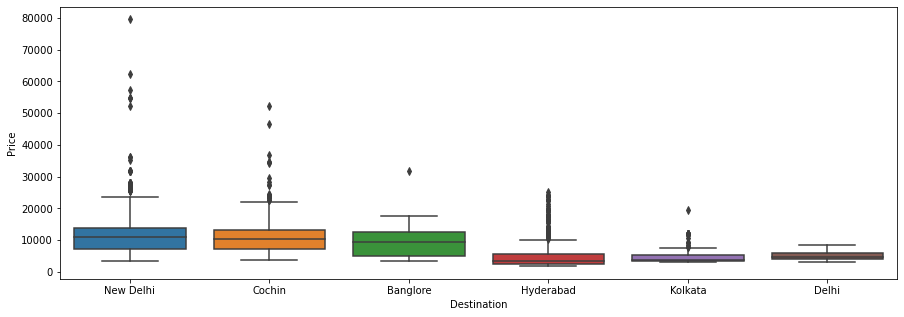

In [113]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False))

In [114]:
Destination=pd.get_dummies(train_data['Destination'])
Airline=pd.get_dummies(train_data['Airline'])


In [115]:
train_data['Route'].str.split('→').str[0]

0        BLR 
1        CCU 
2        DEL 
3        CCU 
4        BLR 
         ... 
10678    CCU 
10679    CCU 
10680    BLR 
10681    BLR 
10682    DEL 
Name: Route, Length: 10682, dtype: object

In [116]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Airline               10682 non-null  object
 1   Source                10682 non-null  object
 2   Destination           10682 non-null  object
 3   Route                 10682 non-null  object
 4   Total_Stops           10682 non-null  object
 5   Additional_Info       10682 non-null  object
 6   Price                 10682 non-null  int64 
 7   journey_day           10682 non-null  int64 
 8   journey_month         10682 non-null  int64 
 9   Dep_Time_hour         10682 non-null  int64 
 10  Dep_Time_minutes      10682 non-null  int64 
 11  Arrival_Time_hour     10682 non-null  int64 
 12  Arrival_Time_minutes  10682 non-null  int64 
 13  Duration_hours        10682 non-null  int32 
 14  Duration_mins         10682 non-null  int32 
dtypes: int32(2), int64(7), object(6)
mem

In [93]:
cat_cols1=[cols for cols in train_data.columns if train_data[cols].dtype=='O']
cat_cols1

Categorical=train_data[cat_cols1]


<AxesSubplot:xlabel='Airline', ylabel='Price'>

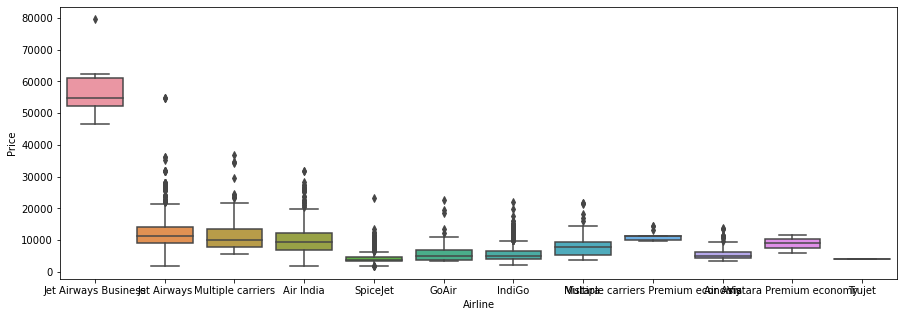

In [117]:
Categorical['Airline'].value_counts()
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))

In [95]:
Airline=pd.get_dummies(Categorical['Airline'])
Source=pd.get_dummies(Categorical['Source'])
Destination=pd.get_dummies(Categorical['Destination'])



In [118]:
Destination

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
10678,1,0,0,0,0,0
10679,1,0,0,0,0,0
10680,0,0,1,0,0,0
10681,0,0,0,0,0,1


In [97]:
Categorical['Route1']=Categorical['Route'].str.split('→').str[0]
Categorical['Route2']=Categorical['Route'].str.split('→').str[1]
Categorical['Route3']=Categorical['Route'].str.split('→').str[2]
Categorical['Route4']=Categorical['Route'].str.split('→').str[3]

<ipython-input-97-5c22a312853b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Categorical['Route1']=Categorical['Route'].str.split('→').str[0]
<ipython-input-97-5c22a312853b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Categorical['Route2']=Categorical['Route'].str.split('→').str[1]
<ipython-input-97-5c22a312853b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [120]:
Categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Route1', 'Route2', 'Route3', 'Route4'],
      dtype='object')

In [119]:
Route3.isna().sum()

NameError: name 'Route3' is not defined

In [121]:
for i in ['Route1', 'Route2', 'Route3', 'Route4']:
    Categorical[i].fillna('None',inplace=True)

C:\Users\pc\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [122]:
drop_col(Categorical,'Route')

C:\Users\pc\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [123]:
for i in Categorical.columns:
    print ('{} has {} Categories'.format(i,len(Categorical[i].value_counts()) ))

Airline has 12 Categories
Source has 5 Categories
Destination has 6 Categories
Total_Stops has 5 Categories
Additional_Info has 10 Categories
Route1 has 5 Categories
Route2 has 45 Categories
Route3 has 30 Categories
Route4 has 14 Categories


In [124]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in ('Route1', 'Route2', 'Route3', 'Route4'):
    Categorical[i]=encoder.fit_transform(Categorical[i])



<ipython-input-124-d0ddae4518ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Categorical[i]=encoder.fit_transform(Categorical[i])


In [125]:
Categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13


In [126]:
Categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [127]:
dict_stop={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

Categorical['Total_Stops']=Categorical['Total_Stops'].map(dict_stop)

<ipython-input-127-55ff441c276d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Categorical['Total_Stops']=Categorical['Total_Stops'].map(dict_stop)


In [ ]:
Categorical.columns

In [ ]:
Categorical.head()

In [129]:
Categorical.drop(columns={'Airline', 'Source', 'Destination', 'Additional_Info'},inplace=True)

C:\Users\pc\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [130]:
Categorical.head()

,Total_Stops,Route1,Route2,Route3,Route4
0,0,0,13,29,13
1,2,2,25,1,3
2,2,3,32,4,5
3,1,2,34,3,13
4,1,0,34,8,13


In [131]:
train_data[['Price', 'journey_day', 'journey_month',
       'Dep_Time_hour', 'Dep_Time_minutes', 'Arrival_Time_hour',
       'Arrival_Time_minutes', 'Duration_hours', 'Duration_mins']]



,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,3,1,11,30,14,10,2,40


In [132]:
pd.concat(train_data[['Price', 'journey_day', 'journey_month',
       'Dep_Time_hour', 'Dep_Time_minutes', 'Arrival_Time_hour',
       'Arrival_Time_minutes', 'Duration_hours', 'Duration_mins']],Airline,axis=1)

TypeError: concat() got multiple values for argument 'axis'

In [133]:
train_data['Price'].dtype
cont_columns=[]
for i in train_data.columns:
    if train_data[i].dtype!='O':
        cont_columns.append(i)
    

In [134]:
cont_columns

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minutes',
 'Arrival_Time_hour',
 'Arrival_Time_minutes',
 'Duration_hours',
 'Duration_mins']

In [135]:
Airline

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,0,0
10679,0,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,1,0


In [136]:
data_train=pd.concat([train_data[cont_columns],Airline,Source,Destination,Categorical,],axis=1)
pd.set_option('display.max_columns',40)


In [ ]:
data_train.head()

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

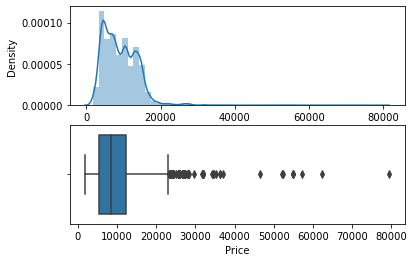

In [137]:
fig,(ax1,ax2)= plt.subplots(2,1)
sns.distplot(data_train['Price'],ax=ax1)
sns.boxplot(data_train['Price'],ax=ax2)

In [138]:
data_train['Price']=np.where(data_train['Price']>40000,data_train['Price'].mean(),data_train['Price'])

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

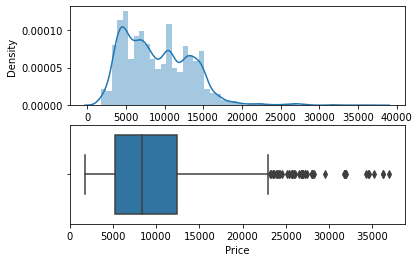

In [139]:
fig,(ax1,ax2)= plt.subplots(2,1)
sns.distplot(data_train['Price'],ax=ax1)
sns.boxplot(data_train['Price'],ax=ax2)

In [140]:
X=data_train.drop('Price',axis=1)


In [ ]:
X.head()

In [141]:
Y=data_train['Price']
Y.dropna()

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [142]:
#np.array(X)
X.dtypes

journey_day                          int64
journey_month                        int64
Dep_Time_hour                        int64
Dep_Time_minutes                     int64
Arrival_Time_hour                    int64
Arrival_Time_minutes                 int64
Duration_hours                       int32
Duration_mins                        int32
Air Asia                             uint8
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Banglore                             uint8
Chennai                              uint8
Delhi                                uint8
Kolkata    

# Feature Selection

In [143]:
from sklearn.feature_selection import mutual_info_classif


In [144]:
mutual_info_classif(X,Y)

ValueError: Unknown label type: 'continuous'